In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,recall_score,f1_score,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mlxtend.classifier import StackingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import datetime
import time
import swifter
import math

In [16]:
# AppLaunchedMod = pd.read_csv('./Data/AppLaunchedMod.csv',sep=',')
# VideoDetailsMod = pd.read_csv('./Data/VideoDetailsMod.csv',sep=',')
# UTMVisitedMod = pd.read_csv('./Data/UTMVisitedMod.csv',sep=',')
RegistrationMod = pd.read_csv('./Data/RegistrationMod.csv',sep=',')
# AppUninstalledMod = pd.read_csv('./Data/AppUninstalledMod.csv',sep=',')
# VideoStartedMod =pd.read_csv('./Data/VideoStartedMod.csv',sep=',')


In [17]:
VideoStartedMod =pd.read_csv('./Data/VideoStartedMod.csv',sep=',')

In [18]:
# AppLaunchedMod.sort_values(['DateTime','UserId'],axis=0,inplace=True)
RegistrationMod.sort_values(['DateTime','UserId'],axis=0,inplace=True)
VideoStartedMod.sort_values(['DateTime','UserId'],axis=0,inplace=True)


In [19]:
VideoStartedMod['DateTime'] = VideoStartedMod['DateTime'].swifter.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))


In [20]:
# AppLaunchedMod['DateTime'] = AppLaunchedMod['DateTime'].swifter.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
RegistrationMod['DateTime'] = RegistrationMod['DateTime'].swifter.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))


In [21]:
# AppLaunchedMod.drop(['Date','Minute_Of_Day','Second','State','Country','Device','OS'],axis=1,inplace=True)
RegistrationMod.drop(['Date','Minute_Of_Day','Second','State','Country','Device','OS'],axis=1,inplace=True)

In [22]:
VideoStartedMod.sort_values(['UserId','DateTime','VideoId'],axis=0,inplace=True)
VideoStartedMod['PreviousDateTime'] = VideoStartedMod['DateTime'].copy()


In [23]:
VideoStartedMod.drop_duplicates(subset=['UserId', 'DateTime', 'VideoId', 'Date', 'Minute_Of_Day', 'Second', 'State', 'Genre', 'Category', 'ProgramType', 'Country', 'Device', 'OS'],keep='first',inplace=True)

In [24]:
VideoStartedMod.PreviousDateTime = VideoStartedMod.groupby(['UserId'])['PreviousDateTime'].shift(1)

In [25]:
VideoStartedMod['Hours'] = VideoStartedMod['DateTime'] - VideoStartedMod['PreviousDateTime']

In [26]:
def diffHours(dd) :
    days, seconds = dd.days, dd.seconds
    hours = days * 24 + seconds // 3600
    return hours

In [27]:
VideoStartedMod['Hours'] = VideoStartedMod['Hours'].swifter.apply(lambda x : diffHours(x))

In [28]:
VideoStartedMod['UserVSFreq'] = ""

In [29]:
Freq = VideoStartedMod['UserId'].value_counts()
VideoStartedMod = VideoStartedMod.merge(Freq,how='inner',left_on='UserId',right_index=True)
VideoStartedMod['UserVSFreq'] = VideoStartedMod['UserId_y'].copy()
VideoStartedMod.drop(['Date','Minute_Of_Day','Second','UserId_x'],axis=1,inplace=True)

In [30]:
VideoStartedMod.drop(['UserId_y'],axis=1,inplace=True)

In [31]:
VideoStartedMod.head()

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,DateTime,StrDateTime,PreviousDateTime,Hours,UserVSFreq
207115,0000146e97c32d369268e5ba5f4b907c,36,Drama,vod,TV Shows,1,1,1,e0902e3677f8445c461a6e23882f6598,2017-02-23 11:48:16,2017-02-23 11:48:16,NaT,NaN,1
787101,00004010d92c2f13b824237bc323d58b,33,Anime,vod,TV Shows,40,2,1,b312c5ff1b66b08a1d5c8e0d072ac371,2017-04-30 21:40:20,2017-04-30 21:40:20,NaT,NaN,2
787140,00004010d92c2f13b824237bc323d58b,33,Family,vod,TV Shows,40,2,1,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56,2017-04-30 21:41:56,2017-04-30 21:40:20,0.0,2
1715539,000076c7bbdf7e4568777134cc4bec56,35,Drama,vod,TV Shows,1,1,2,f0961889cad44180693b249ad0718b78,2017-06-09 19:59:00,2017-06-09 19:59:00,NaT,NaN,8
1736368,000076c7bbdf7e4568777134cc4bec56,35,Drama,vod,TV Shows,1,1,2,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,2017-06-10 20:17:48,2017-06-09 19:59:00,24.0,8


In [93]:
VideoStartedMod.drop(VideoStartedMod[(VideoStartedMod['UserVSFreq'] > 1) & (VideoStartedMod['Hours'].isnull() == True)].index,inplace=True)

In [94]:
VideoStartedMod[(VideoStartedMod['UserVSFreq'] == 1) & (VideoStartedMod['Hours'].isnull() == True)]

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,DateTime,StrDateTime,PreviousDateTime,Hours,UserVSFreq,UserId_y
207115,0000146e97c32d369268e5ba5f4b907c,36,Drama,vod,TV Shows,1,1,1,e0902e3677f8445c461a6e23882f6598,2017-02-23 11:48:16,2017-02-23 11:48:16,NaT,NaN,1,1
1425208,000296c274f089ee214456d7cd4860aa,33,Reality Show,linear,Channels,40,1,1,e6ea7e407888ec088e91bafe475c91d0,2017-05-29 10:24:00,2017-05-29 10:24:00,NaT,NaN,1,1
964582,00033dcbc900cad4c0cef13b3cef044e,46,Drama,vod,TV Shows,40,1,1,5c0f1f6e255af1a4b8f61f778c0529bd,2017-05-08 15:16:00,2017-05-08 15:16:00,NaT,NaN,1,1
196692,00062cb900c6dc04b197e627bd829268,46,Comedy,vod,Movies,40,2,1,2940828ef5e75030719a69c057d34ba0,2017-02-19 15:11:08,2017-02-19 15:11:08,NaT,NaN,1,1
1522133,0006fcbfd4e12842039a7c94f0879d43,12,Anime,vod,TV Shows,2,1,1,2661e5bbd26bd4676aa4351ea1d52e63,2017-06-02 01:18:20,2017-06-02 01:18:20,NaT,NaN,1,1
348962,0007499b1f171b87872cc22699804a48,49,Drama,vod,TV Shows,1,1,1,1907e803fecea7e4c0b1e09509566146,2017-03-28 17:33:28,2017-03-28 17:33:28,NaT,NaN,1,1
19444,0009298c761ea2936716e152b5cdb3e7,33,Drama,vod,TV Shows,40,1,1,0ecb3627293da03fe727510f155686af,2017-01-09 02:46:32,2017-01-09 02:46:32,NaT,NaN,1,1
1014175,000a34241712b3673650222cbc5e7a4c,16,Drama,vod,TV Shows,40,1,1,5c0f1f6e255af1a4b8f61f778c0529bd,2017-05-11 00:47:20,2017-05-11 00:47:20,NaT,NaN,1,1
73862,000b4e5edd4d90f9455a6560afa3887d,0,Talk Show,linear,Channels,255,1,1,e6ea7e407888ec088e91bafe475c91d0,2017-01-21 16:29:48,2017-01-21 16:29:48,NaT,NaN,1,1
155544,000b8c845ab7c1517428990c2dacc4cd,2,Drama,vod,TV Shows,1,1,1,041b13997aae76c8d63d3c546e2f504a,2017-02-08 04:06:40,2017-02-08 04:06:40,NaT,NaN,1,1


In [97]:
VideoStartedMod['Watched'] = ""

In [98]:
VideoStartedMod['Watched'] = VideoStartedMod['Hours'].swifter.apply(lambda x : 1 if x <= 48.0 else 0)

In [99]:
# VideoStartedMod[(VideoStartedMod['UserVSFreq'] == 1) & (VideoStartedMod['Hours'].isnull() == True)]
VideoStartedMod['Watched'].where(VideoStartedMod['Hours'].notnull(),other=2,inplace=True)

In [100]:
VideoStartedMod.Hours.fillna(0.1,inplace=True)

In [101]:
VideoStartedMod.sort_values(['DateTime', 'UserId','VideoId'],axis=0,inplace=True)
RegistrationMod.sort_values(['DateTime', 'UserId','Status'],axis=0,inplace=True)

In [102]:
VS_VD_Merge = pd.merge_asof(VideoStartedMod,RegistrationMod, on='DateTime', by=['UserId'],allow_exact_matches=False,direction='backward')

In [138]:
VS_VD_Merge.isnull().sum()
# VS_VD_Merge.shape

UserId         0
State          0
Genre          0
Category       0
ProgramType    0
Country        0
Device         0
OS             0
VideoId        0
Hours          0
Watched        0
Status         0
appLFreq       0
VDFreq         0
UTMFreq        0
RFreq          0
appUFreq       0
VSFreq         0
UniqueUsers    0
ALUsers        0
VDUsers        0
UTMUsers       0
RUsers         0
AUUsers        0
VSUsers        0
dtype: int64

In [109]:
# VS_VD_Merge.dropna(axis=0,subset=['Status'],inplace=True)

In [110]:
VS_VD_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754634 entries, 0 to 1754633
Data columns (total 28 columns):
UserId              object
State               float64
Genre               object
Category            object
ProgramType         object
Country             float64
Device              float64
OS                  float64
VideoId             object
DateTime            datetime64[ns]
StrDateTime_x       object
PreviousDateTime    datetime64[ns]
Hours               float64
UserVSFreq          float64
Watched             float64
Status              object
StrDateTime_y       object
Country_x           float64
Device_x            float64
OS_x                float64
State_x             float64
UniqueUsers         object
appLFreq            float64
VDFreq              float64
UTMFreq             float64
RFreq               float64
appUFreq            float64
VSFreq              float64
dtypes: datetime64[ns](2), float64(17), object(9)
memory usage: 388.2+ MB


In [104]:
VS_VD_Merge.sort_values(['UserId','DateTime'],axis=0,inplace=True)

In [61]:
VS_VD_Merge[VS_VD_Merge['UserId']=='c54bdaeede84534ac0f36a068f753d18']

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,DateTime,StrDateTime_x,PreviousDateTime,Hours,UserVSFreq,Watched,Status,StrDateTime_y
506529,c54bdaeede84534ac0f36a068f753d18,33,Drama,vod,TV Shows,40,1,1,73c2d761c22f17d2278a0a35ef99cd9d,2017-04-23 12:24:44,2017-04-23 12:24:44,2017-04-22 21:39:52,14.0,44,1,Completed,2017-04-22 21:37:40
506537,c54bdaeede84534ac0f36a068f753d18,33,Drama,vod,TV Shows,40,1,1,73c2d761c22f17d2278a0a35ef99cd9d,2017-04-23 12:25:12,2017-04-23 12:25:12,2017-04-23 12:24:44,0.0,44,1,Completed,2017-04-22 21:37:40
507760,c54bdaeede84534ac0f36a068f753d18,33,Drama,vod,TV Shows,40,1,1,07cb62332507d535a8777fe85b38cbc3,2017-04-23 13:36:32,2017-04-23 13:36:32,2017-04-23 12:25:12,1.0,44,1,Completed,2017-04-22 21:37:40
508977,c54bdaeede84534ac0f36a068f753d18,33,Drama,vod,TV Shows,40,1,1,fb017e087fb7eac6523e5b37149c9341,2017-04-23 14:45:28,2017-04-23 14:45:28,2017-04-23 13:36:32,1.0,44,1,Completed,2017-04-22 21:37:40
510098,c54bdaeede84534ac0f36a068f753d18,33,Drama,vod,TV Shows,40,1,1,f6c7712cb7bfc4cc08973e9d869e5ef7,2017-04-23 15:58:24,2017-04-23 15:58:24,2017-04-23 14:45:28,1.0,44,1,Completed,2017-04-22 21:37:40
513046,c54bdaeede84534ac0f36a068f753d18,33,Drama,vod,TV Shows,40,1,1,6e82eecf8fd95e50d496289c3ff9db85,2017-04-23 18:58:36,2017-04-23 18:58:36,2017-04-23 15:58:24,3.0,44,1,Completed,2017-04-22 21:37:40
514745,c54bdaeede84534ac0f36a068f753d18,33,Drama,vod,TV Shows,40,1,1,92c56616ab5e6fe5095cfdd69c6bc167,2017-04-23 20:06:24,2017-04-23 20:06:24,2017-04-23 18:58:36,1.0,44,1,Completed,2017-04-22 21:37:40
516411,c54bdaeede84534ac0f36a068f753d18,33,Drama,vod,TV Shows,40,1,1,1907e803fecea7e4c0b1e09509566146,2017-04-23 21:24:00,2017-04-23 21:24:00,2017-04-23 20:06:24,1.0,44,1,Completed,2017-04-22 21:37:40
527486,c54bdaeede84534ac0f36a068f753d18,33,Drama,vod,TV Shows,40,1,1,9ee49a1921661e910cc8cbecdc14f584,2017-04-24 03:44:52,2017-04-24 03:44:52,2017-04-23 21:24:00,6.0,44,1,Completed,2017-04-22 21:37:40
528526,c54bdaeede84534ac0f36a068f753d18,33,Drama,vod,TV Shows,40,1,1,4d749fc7dbd2cbde1db2ce63eef7fa5e,2017-04-24 04:51:32,2017-04-24 04:51:32,2017-04-24 03:44:52,1.0,44,1,Completed,2017-04-22 21:37:40


In [62]:
RegistrationMod[RegistrationMod['UserId']=='c54bdaeede84534ac0f36a068f753d18']

,UserId,Status,DateTime,StrDateTime
171907,c54bdaeede84534ac0f36a068f753d18,Completed,2017-04-22 21:37:40,2017-04-22 21:37:40
184130,c54bdaeede84534ac0f36a068f753d18,Not Completed,2017-04-26 00:14:20,2017-04-26 00:14:20
184135,c54bdaeede84534ac0f36a068f753d18,Not Completed,2017-04-26 00:15:40,2017-04-26 00:15:40
184153,c54bdaeede84534ac0f36a068f753d18,Completed,2017-04-26 00:20:32,2017-04-26 00:20:32
209283,c54bdaeede84534ac0f36a068f753d18,Not Completed,2017-05-03 13:10:00,2017-05-03 13:10:00
277231,c54bdaeede84534ac0f36a068f753d18,Not Completed,2017-05-26 12:25:52,2017-05-26 12:25:52
277256,c54bdaeede84534ac0f36a068f753d18,Not Completed,2017-05-26 12:35:56,2017-05-26 12:35:56
277266,c54bdaeede84534ac0f36a068f753d18,Not Completed,2017-05-26 12:40:32,2017-05-26 12:40:32


In [105]:
FrequencyData = pd.read_csv('./Data/FrequencyData.csv',sep=',')

In [106]:
VS_VD_Merge = VS_VD_Merge.merge(FrequencyData,how='outer',left_on='UserId',right_on='UniqueUsers')

In [107]:
VS_VD_Merge

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,DateTime,...,Device_x,OS_x,State_x,UniqueUsers,appLFreq,VDFreq,UTMFreq,RFreq,appUFreq,VSFreq
0,0000146e97c32d369268e5ba5f4b907c,36.0,Drama,vod,TV Shows,1.0,1.0,1.0,e0902e3677f8445c461a6e23882f6598,2017-02-23 11:48:16,...,1.0,1.0,36.0,0000146e97c32d369268e5ba5f4b907c,1.0,5.0,4.0,1.0,1.0,1.0
1,00004010d92c2f13b824237bc323d58b,33.0,Family,vod,TV Shows,40.0,2.0,1.0,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56,...,2.0,1.0,33.0,00004010d92c2f13b824237bc323d58b,1.0,4.0,2.0,1.0,1.0,2.0
2,000076c7bbdf7e4568777134cc4bec56,35.0,Drama,vod,TV Shows,1.0,1.0,2.0,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,...,1.0,2.0,35.0,000076c7bbdf7e4568777134cc4bec56,1.0,23.0,1.0,1.0,0.0,9.0
3,000076c7bbdf7e4568777134cc4bec56,35.0,Drama,vod,TV Shows,1.0,1.0,2.0,be2162c0d1c1579906f9748f6cf550cb,2017-06-10 20:19:16,...,1.0,2.0,35.0,000076c7bbdf7e4568777134cc4bec56,1.0,23.0,1.0,1.0,0.0,9.0
4,000076c7bbdf7e4568777134cc4bec56,35.0,Drama,vod,TV Shows,1.0,1.0,2.0,eae5d671f3ceedc73d80ce70af5db662,2017-06-10 20:55:08,...,1.0,2.0,35.0,000076c7bbdf7e4568777134cc4bec56,1.0,23.0,1.0,1.0,0.0,9.0
5,000076c7bbdf7e4568777134cc4bec56,35.0,TV Shows (General),linear,Channels,1.0,1.0,2.0,a4a773531e35757badfe759f6d69e7a7,2017-06-10 23:47:44,...,1.0,2.0,35.0,000076c7bbdf7e4568777134cc4bec56,1.0,23.0,1.0,1.0,0.0,9.0
6,000076c7bbdf7e4568777134cc4bec56,35.0,Romance,vod,Movies,1.0,1.0,2.0,4e271ba673f22c327c041ba4bd2f8fd5,2017-06-11 00:50:36,...,1.0,2.0,35.0,000076c7bbdf7e4568777134cc4bec56,1.0,23.0,1.0,1.0,0.0,9.0
7,000076c7bbdf7e4568777134cc4bec56,35.0,Reality Show,vod,TV Shows,1.0,1.0,2.0,bfb30f8af44876e2c45013364ad72f0d,2017-06-11 10:31:04,...,1.0,2.0,35.0,000076c7bbdf7e4568777134cc4bec56,1.0,23.0,1.0,1.0,0.0,9.0
8,000076c7bbdf7e4568777134cc4bec56,35.0,Drama,vod,TV Shows,1.0,1.0,2.0,c91c602e011f81376f8636c851d50fa8,2017-06-12 05:43:48,...,1.0,2.0,35.0,000076c7bbdf7e4568777134cc4bec56,1.0,23.0,1.0,1.0,0.0,9.0
9,0000e560394fce891dcf80218793d181,40.0,Anime,vod,TV Shows,1.0,1.0,1.0,ef2b70be31de6dd74ede3212bd385a2c,2017-03-25 13:11:56,...,1.0,1.0,40.0,0000e560394fce891dcf80218793d181,1.0,17.0,1.0,1.0,1.0,3.0


In [66]:
VS_VD_Merge['appLFreq'].fillna(0.0, inplace=True)
VS_VD_Merge['VDFreq'].fillna(0.0, inplace=True)
VS_VD_Merge['UTMFreq'].fillna(0.0, inplace=True)
VS_VD_Merge['RFreq'].fillna(0.0, inplace=True)
VS_VD_Merge['appUFreq'].fillna(0.0, inplace=True)
VS_VD_Merge['VSFreq'].fillna(0.0, inplace=True)


In [111]:
FrequencyData[FrequencyData['appLFreq'].isnull()].notnull().sum()

Country_x      0
Device_x       0
OS_x           0
State_x        0
UniqueUsers    0
appLFreq       0
VDFreq         0
UTMFreq        0
RFreq          0
appUFreq       0
VSFreq         0
dtype: int64

In [112]:
VS_VD_Merge.UserId = VS_VD_Merge.UniqueUsers.copy()

In [113]:
VS_VD_Merge.drop(['UniqueUsers','UserVSFreq'],axis=1,inplace=True)

In [73]:
# VS_VD_Merge.Status.fillna('Not Registered',inplace=True)

In [114]:
VS_VD_Merge['State'].where(VS_VD_Merge['State'].notnull(),other=VS_VD_Merge['State_x'],inplace=True)
VS_VD_Merge['Country'].where(VS_VD_Merge['Country'].notnull(),other=VS_VD_Merge['Country_x'],inplace=True)
VS_VD_Merge['OS'].where(VS_VD_Merge['OS'].notnull(),other=VS_VD_Merge['OS_x'],inplace=True)
VS_VD_Merge['Device'].where(VS_VD_Merge['Device'].notnull(),other=VS_VD_Merge['Device_x'],inplace=True)

In [117]:
VS_VD_Merge.drop(['DateTime', 'StrDateTime_x','PreviousDateTime', 'StrDateTime_y','Country_x', 'Device_x', 'OS_x', 'State_x'],axis=1,inplace=True)

In [119]:
VS_VD_Merge.Genre.fillna('Not Applicable',inplace=True)
VS_VD_Merge.ProgramType.fillna('Not Applicable',inplace=True)
VS_VD_Merge.Category.fillna('Not Applicable',inplace=True)
VS_VD_Merge.VideoId.fillna('Not Applicable',inplace=True)
VS_VD_Merge.Hours.fillna(5000.0,inplace=True)
VS_VD_Merge.Watched.fillna(3,inplace=True)

In [121]:
RegistrationMod.sort_values(['DateTime', 'UserId','Status'],axis=0,inplace=True,ascending=False)
RegistrationMod.drop(['DateTime','StrDateTime'],axis=1,inplace=True)
RegistrationMod.drop_duplicates(inplace=True)


In [127]:
RegistrationMod.columns = ['UserId', 'StatusT']

In [128]:
VS_VD_Merge = VS_VD_Merge.merge(RegistrationMod,how='left',left_on='UserId', right_on='UserId')

In [131]:
VS_VD_Merge['Status'].where(VS_VD_Merge['Status'].notnull(),other=VS_VD_Merge['StatusT'],inplace=True)

In [133]:
VS_VD_Merge.Status.fillna('Not Registered',inplace=True)
VS_VD_Merge.drop(['StatusT'],axis=1,inplace=True)

In [136]:
MainDataset = pd.read_csv('./Data/MainDataset.csv',sep=',')

In [137]:
VS_VD_Merge = VS_VD_Merge.merge(MainDataset,how='left',left_on='UserId',right_on='UniqueUsers')

In [139]:
VS_VD_Merge.drop(['UniqueUsers'],axis=1,inplace=True)

In [142]:
VS_VD_Merge = VS_VD_Merge[['UserId', 'State', 'Genre', 'Category', 'ProgramType', 'Country', 'Device', 'OS', 'VideoId', 'Hours', 'Status', 'appLFreq', 'VDFreq', 'UTMFreq', 'RFreq', 'appUFreq', 'VSFreq', 'ALUsers', 'VDUsers', 'UTMUsers', 'RUsers', 'AUUsers', 'VSUsers', 'Watched']]

In [15]:
VS_VD_Merge[VS_VD_Merge.Watched == 1]

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Hours,...,RFreq,appUFreq,VSFreq,ALUsers,VDUsers,UTMUsers,RUsers,AUUsers,VSUsers,Watched
1,-1.718354,-0.345239,-0.360324,0.215522,0.471081,0.525235,4.254026,-0.346784,1.005088,-0.415251,...,-0.393326,0.946641,-0.530364,1,1,1,1,1,1,1.0
2,-1.718339,-0.283367,-0.610168,0.215522,0.471081,-0.366996,-0.205439,2.763060,1.452357,-0.401472,...,-0.393326,-1.016436,-0.469846,1,1,1,1,0,1,1.0
3,-1.718339,-0.283367,-0.610168,0.215522,0.471081,-0.366996,-0.205439,2.763060,0.769998,-0.415251,...,-0.393326,-1.016436,-0.469846,1,1,1,1,0,1,1.0
4,-1.718339,-0.283367,-0.610168,0.215522,0.471081,-0.366996,-0.205439,2.763060,1.369677,-0.415251,...,-0.393326,-1.016436,-0.469846,1,1,1,1,0,1,1.0
5,-1.718339,-0.283367,1.138739,-1.361242,-1.443035,-0.366996,-0.205439,2.763060,0.408397,-0.414103,...,-0.393326,-1.016436,-0.469846,1,1,1,1,0,1,1.0
6,-1.718339,-0.283367,0.888895,0.215522,-0.485977,-0.366996,-0.205439,2.763060,-0.750120,-0.414677,...,-0.393326,-1.016436,-0.469846,1,1,1,1,0,1,1.0
7,-1.718339,-0.283367,0.763973,0.215522,0.471081,-0.366996,-0.205439,2.763060,0.793905,-0.410084,...,-0.393326,-1.016436,-0.469846,1,1,1,1,0,1,1.0
8,-1.718339,-0.283367,-0.610168,0.215522,0.471081,-0.366996,-0.205439,2.763060,0.926392,-0.404342,...,-0.393326,-1.016436,-0.469846,1,1,1,1,0,1,1.0
9,-1.718324,-0.128687,-1.297239,0.215522,0.471081,-0.366996,-0.205439,-0.346784,1.434427,-0.404342,...,-0.393326,0.946641,-0.521719,1,1,1,1,1,1,1.0
10,-1.718324,-0.128687,0.139363,0.215522,-0.485977,-0.366996,-0.205439,-0.346784,-1.736304,-0.415251,...,-0.393326,0.946641,-0.521719,1,1,1,1,1,1,1.0


5000.0

In [2]:
VS_VD_Merge = pd.read_csv('./Data/VS_VD_Merge.csv',sep=',')

In [149]:
# VS_VD_Merge.to_csv(path_or_buf='./Data/VS_VD_Merge.csv',sep=',',index=False)

In [3]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
Data_Encoded = dummyEncode(VS_VD_Merge)

Highly Correlated Variables


Hours        VSUsers       -0.999356
VSUsers      Hours         -0.999356
             Watched       -0.931833
Watched      VSUsers       -0.931833
Status       RUsers        -0.810861
RUsers       Status        -0.810861
Hours        Watched        0.924210
Watched      Hours          0.924210
Category     ProgramType    0.954360
ProgramType  Category       0.954360
AUUsers      appUFreq       0.989097
appUFreq     AUUsers        0.989097
dtype: float64

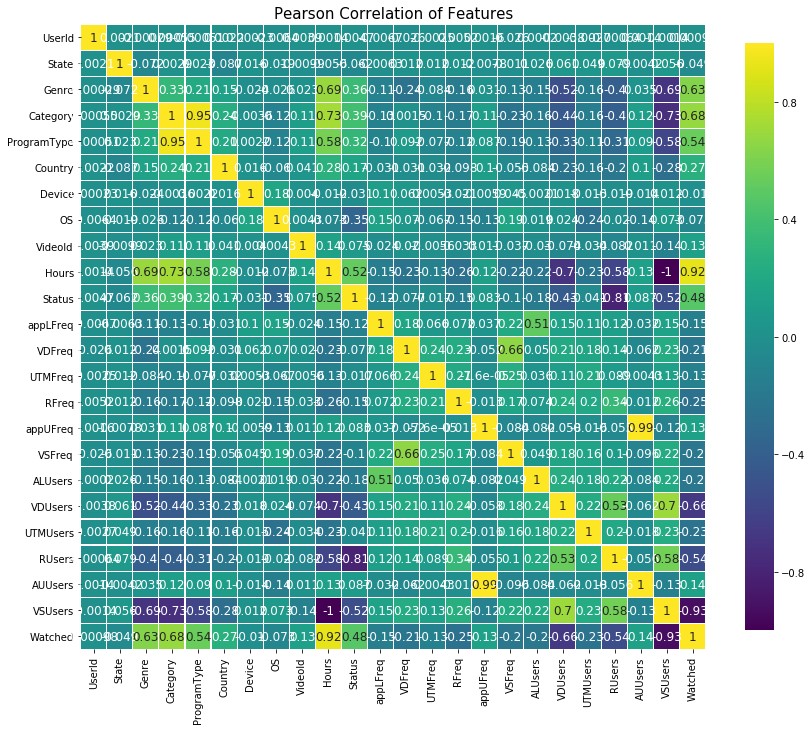

In [4]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(VS_VD_Merge)

In [5]:
scaler = StandardScaler()

In [6]:
X = Data_Encoded.iloc[:,:-1]
y = Data_Encoded.iloc[:,-1]

In [7]:
Data_Encoded.columns

Index(['UserId', 'State', 'Genre', 'Category', 'ProgramType', 'Country',
       'Device', 'OS', 'VideoId', 'Hours', 'Status', 'appLFreq', 'VDFreq',
       'UTMFreq', 'RFreq', 'appUFreq', 'VSFreq', 'ALUsers', 'VDUsers',
       'UTMUsers', 'RUsers', 'AUUsers', 'VSUsers', 'Watched'],
      dtype='object')

In [7]:
Data_Encoded['UserId'] = scaler.fit_transform(Data_Encoded[['UserId']])
Data_Encoded['State'] = scaler.fit_transform(Data_Encoded[['State']])
Data_Encoded['Genre'] = scaler.fit_transform(Data_Encoded[['Genre']])
Data_Encoded['Category'] = scaler.fit_transform(Data_Encoded[['Category']])
Data_Encoded['ProgramType'] = scaler.fit_transform(Data_Encoded[['ProgramType']])
Data_Encoded['Country'] = scaler.fit_transform(Data_Encoded[['Country']])
Data_Encoded['Device'] = scaler.fit_transform(Data_Encoded[['Device']])
Data_Encoded['OS'] = scaler.fit_transform(Data_Encoded[['OS']])
Data_Encoded['VideoId'] = scaler.fit_transform(Data_Encoded[['VideoId']])
Data_Encoded['Hours'] = scaler.fit_transform(Data_Encoded[['Hours']])
Data_Encoded['Status'] = scaler.fit_transform(Data_Encoded[['Status']])
Data_Encoded['appLFreq'] = scaler.fit_transform(Data_Encoded[['appLFreq']])
Data_Encoded['VDFreq'] = scaler.fit_transform(Data_Encoded[['VDFreq']])
Data_Encoded['UTMFreq'] = scaler.fit_transform(Data_Encoded[['UTMFreq']])
Data_Encoded['RFreq'] = scaler.fit_transform(Data_Encoded[['RFreq']])
Data_Encoded['appUFreq'] = scaler.fit_transform(Data_Encoded[['appUFreq']])
Data_Encoded['VSFreq'] = scaler.fit_transform(Data_Encoded[['VSFreq']])

In [11]:
X.drop('Hours',axis=1,inplace=True)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [160]:
def run_model(X_train, y_train,X_test,y_test,model):
    
    #X_train,X_test,y_train,y_test = train_test_split(predictor_train,target_train,test_size=0.2,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(y_pred.shape)
    print(model)
    print('Precision is',precision_score(y_test, y_pred))
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print('F1 score:',f1_score(y_test,y_pred))
    print('Recall Score:',recall_score(y_test,y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    print('Confusion Matrix:\n')
    print(tp,fp)
    print(fn,tn)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return y_pred

In [165]:
#models = [GaussianNB,LinearDiscriminantAnalysis,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,GradientBoostingClassifier]

models = [LogisticRegression]


# for model in models:
    # run model
#     model = LogisticRegression(multi_class='multinomial',solver='newton-cg',class_weight='balanced')
#     run_model(X_train, y_train,X_test,y_test,model)

# model = LogisticRegression(multi_class='multinomial',solver='newton-cg',class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
print(y_pred.shape)
print(model)
print('Precision is',precision_score(y_test, y_pred,average='weighted'))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('F1 score:',f1_score(y_test,y_pred,average='weighted'))
print('Recall Score:',recall_score(y_test,y_pred,average='weighted'))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# print('Confusion Matrix:\n')
# print(tp,fp)
# print(fn,tn)
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

(429170,)
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)
Precision is 0.9712941057452349
Accuracy: 0.9335531374513596
F1 score: 0.9462691647972818
Recall Score: 0.9335531374513596


ValueError: too many values to unpack (expected 4)

In [13]:
model = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42,class_weight="balanced")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
print(y_pred.shape)
print(model)
print('Precision is',precision_score(y_test, y_pred,average='weighted'))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('F1 score:',f1_score(y_test,y_pred,average='weighted'))
print('Recall Score:',recall_score(y_test,y_pred,average='weighted'))
# tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# print('Confusion Matrix:\n')
# print(tp,fp)
# print(fn,tn)
    
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
# plt.plot(false_positive_rate, true_positive_rate)
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC curve')
# plt.show()

(429170,)
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)
Precision is 0.9199324132045914
Accuracy: 0.9129808700514948
F1 score: 0.9162757205841815
Recall Score: 0.9129808700514948


In [9]:
y.value_counts()

1.0    1671882
3.0     304946
0.0     124135
2.0      44884
Name: Watched, dtype: int64